In [78]:
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')

In [79]:
import pandas as pd
df = dataset['train'].to_pandas()

In [80]:
df.info() #   job_posted_date        785741 non-null  object ---should be datetime datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [81]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [82]:
type(df['job_posted_date'])

pandas.core.series.Series

In [83]:
from ast import literal_eval

In [84]:
df['job_skills'] = df['job_skills'].apply(lambda x: literal_eval(x) if pd.notna(x) else x) #to make the columns data in their true datatype - list
df['job_type_skills'] = df['job_type_skills'].apply(lambda x: literal_eval(x) if pd.notna(x) else x) #to make the columns data in their true datatype - dict

In [85]:
(type(df['job_skills'].loc[5]),
type(df['job_type_skills'].loc[5]))

(list, dict)

In [86]:
Job_counts_domain = df['job_title_short'].value_counts().sort_values(ascending = False).to_frame()
Job_counts_domain

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

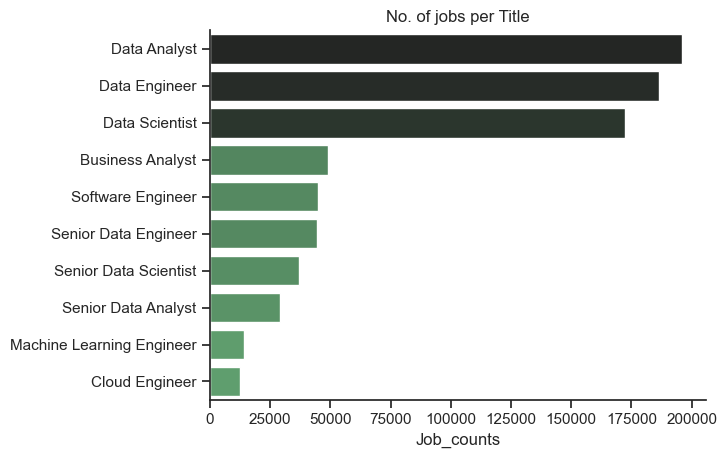

In [88]:
# Job_counts_domain.plot(kind = 'barh', legend = False, title= 'No. of jobs per Title', xlabel= 'Job_counts_domain', ylabel ='').invert_yaxis()  #----->PANDAS method [sbkuch 1 line mail likh skte hai] but in seaborn can't becausse it's origin is matplotlib
# plt.show()

# Job_counts_domain.plot(kind='barh', x='job_title_short', y='count', legend = False, title= 'No. of jobs per Title', xlabel= 'Job_counts_domain', ylabel ='').invert_yaxis()  #----->this can't work because 1. It's in pandas and df doesn't have the job_title_short col as index due to value_counts, so either we have to reset index/add index then only it can work because the x and y it takes in the parameters should be a column not a index



sns.set_theme(style='ticks')  #lighten the theme of graph
sns.barplot(data = Job_counts_domain, x = 'count', y = 'job_title_short', palette= 'dark:g_r', hue='count', legend = False)
sns.despine() # This removes the top and right border lines
plt.title('No. of jobs per Title')
plt.xlabel('Job_counts')
plt.ylabel('')
plt.show()

In [89]:
Job_counts_country = df[df['job_country'] != 'United States']['job_country'].value_counts().to_frame().head(20)
Job_counts_country

,count
job_country,
India,51088
United Kingdom,40375
France,39922
Germany,27694
Spain,25100
Singapore,23696
Sudan,21781
Netherlands,20631
Italy,17013


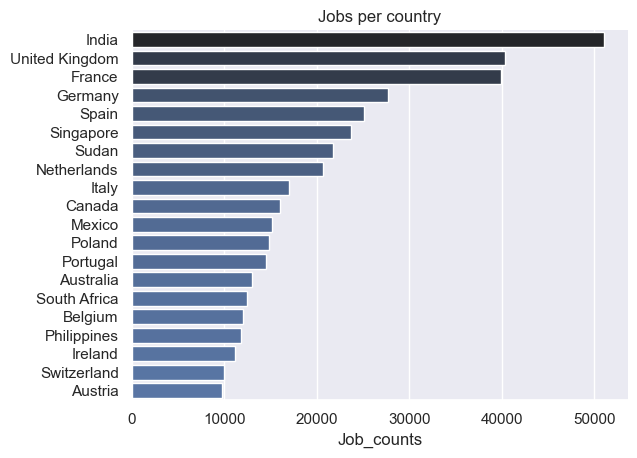

In [90]:
sns.set_theme(style= 'darkgrid')
sns.barplot(data = Job_counts_country, x = 'count', y = 'job_country', palette= 'dark:b_r', hue='count', legend = False)
sns.despine()
plt.title('Jobs per country')
plt.xlabel('Job_counts')
plt.ylabel('')
plt.show()

In [91]:
Job_counts_company = df['company_name'][df['company_name'] != 'Emprego'].value_counts().to_frame().head(20)
Job_counts_company

,count
company_name,
Booz Allen Hamilton,2879
Dice,2827
Harnham,2547
Insight Global,2254
Citi,2164
Confidenziale,2040
Listopro,1984
Capital One,1946
Walmart,1863


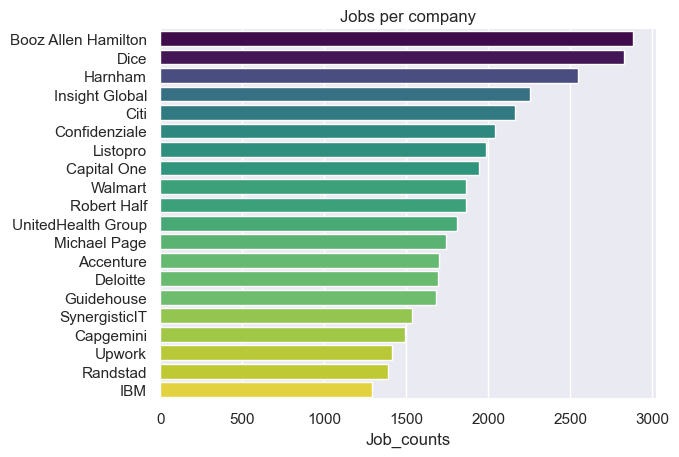

In [92]:
sns.set_theme(style= 'darkgrid')
sns.barplot(data = Job_counts_company, x = 'count', y = 'company_name', palette= 'viridis_r', hue='count', legend = False)
sns.despine()
plt.title('Jobs per company')
plt.xlabel('Job_counts')
plt.ylabel('')
plt.show()

In [146]:
# work_from_home = df['job_work_from_home'].value_counts()
# job_no_degree = df['job_no_degree_mention'].value_counts()
# Health_insurance = df['job_health_insurance'].value_counts()

# #set up the matplotlib figure
# fig, ax = plt.subplots(1, 1)
# plt.subplot(1, 1, 1)
# plt.pie(x = work_from_home, labels= work_from_home.index , autopct = '%1.1f%%', startangle= 90)   #, colors = sns.color_palette('Pastel1')[:len(work_from_home)]) # pastel but bright
# plt.title('Work from Hom Offered')
# plt.show()

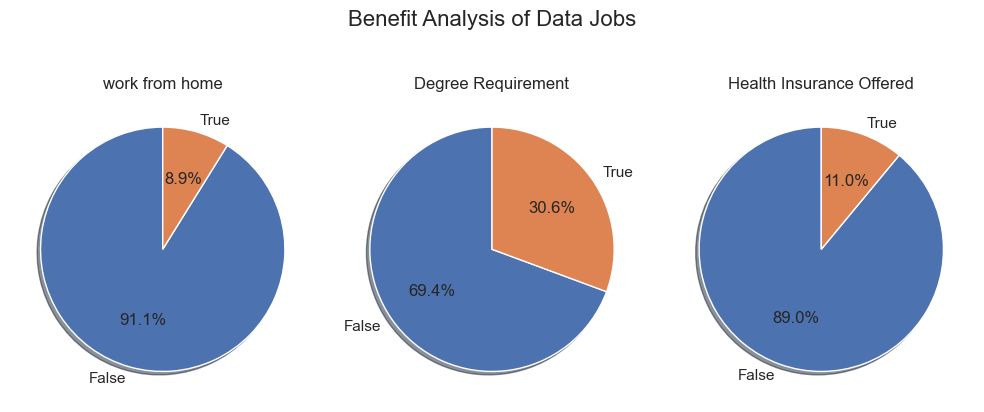

In [147]:
dict_column = {
    'job_work_from_home' : 'work from home',
    'job_no_degree_mention' : 'Degree Requirement',
    'job_health_insurance' : 'Health Insurance Offered'
}


fig, ax = plt.subplots(1, 3)
fig.set_size_inches((10, 5))
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels = df[column].value_counts().index, autopct = '%1.1f%%', startangle = 90, shadow=True)
    ax[i].set_title(title)

plt.tight_layout()
plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

In [180]:
df_da_India = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]

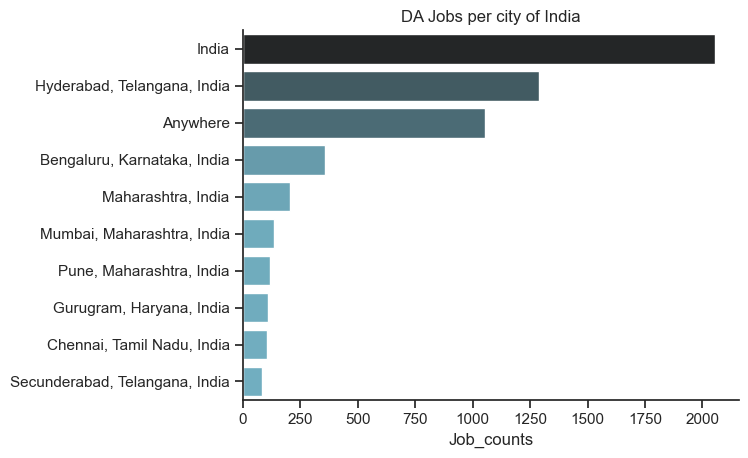

In [183]:
Location_DA_India = df_da_India['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style= 'ticks')
sns.barplot(data= Location_DA_India, y = 'job_location', x = 'count', palette= 'dark:c_r', hue='count', legend = False)
sns.despine()
plt.title('DA Jobs per city of India')
plt.xlabel('Job_counts')
plt.ylabel('')
plt.show()

In [185]:
df.head(1)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None


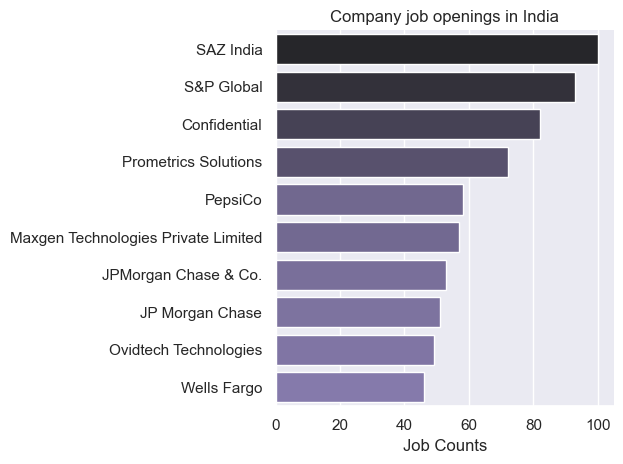

In [196]:
df_company_job_openings_india = df_da_India['company_name'].value_counts().head(10).to_frame()

sns.set_style('darkgrid')
sns.barplot(df_company_job_openings_india, y = 'company_name', x = 'count', palette= 'dark:m_r', hue = 'count', legend = False)
sns.despine()
plt.title('Company job openings in India')
plt.xlabel('Job Counts')
plt.ylabel('')
plt.tight_layout()
plt.show()
